In [5]:
import math
import numpy as np
from scipy import optimize
from matplotlib import pyplot

In [6]:
def custom_function (arg):
    return math.sin(arg / 5.) * math.exp(arg / 10.) + 5. * math.exp(-arg / 2.)

def custom_vector_function(arg_Vector):
    return np.array( map(custom_function, arg_Vector) )

In [7]:
values_x = np.arange(1, 30, 0.1)
values_y = custom_vector_function(values_x)
print "x (min, max, shape) -", values_x[0], values_x[-1], values_x.shape
print "y (first, last, shape) -", values_y[0], values_y[-1],values_y.shape

x (min, max, shape) - 1.0 29.900000000000027 (290L,)
y (first, last, shape) - 3.252216865271419 -5.937102407424487 (290L,)


In [27]:
x_bias = values_x[0]

initial_approximation = [2, 30]

min_result1 = optimize.minimize(fun=custom_function, x0=[initial_approximation[0]], method = "BFGS")
min_result2 = optimize.minimize(fun=custom_function, x0=[initial_approximation[1]], method = "BFGS")

min_point1 = (min_result1.x[0], values_y[int((min_result1.x[0]-x_bias)*10)])
min_point2 = (min_result2.x[0], values_y[int((min_result2.x[0]-x_bias)*10)])

print "Initial approx. = ", initial_approximation
#print "Optimisation: OK = ", min_result.success, " Message = ", min_result.message, "Result = ", min_result.x
print "Calculated min, point = ", min_point1, ", ", min_point2, " / x-bias = ", x_bias

Initial approx. =  [2, 30]
Calculated min, point =  (4.136276281772837, 1.745378057682602) ,  (25.880193206142593, -11.896991866210282)  / x-bias =  1.0


Min. value of func (check) =  -11.898777807806216
Min. value index  (check) =  25.9

Min. value #1 of func (calculated) =  1.745378057682602
Min. value #1 index  (calculated) =  4.136276281772837

Min. value #2 of func (calculated) =  -11.896991866210282
Min. value #2 index  (calculated) =  25.880193206142593


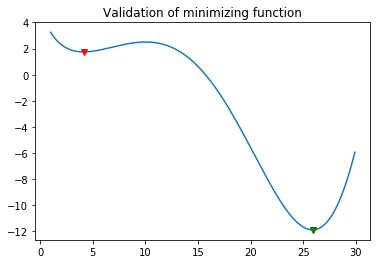

Approximation error#1 =  [21.76372372]
Approximation error#2 =  [0.01980679]

Answer:  1.75 ,  -11.90


In [28]:
check_min_value_func = values_y.min()
check_min_value_index = x_bias + (np.where(values_y == values_y.min())[0])/10.
    
print "Min. value of func (check) = ", check_min_value_func
print "Min. value index  (check) = ", check_min_value_index[0]

print "\nMin. value #1 of func (calculated) = ", min_point1[1]
print "Min. value #1 index  (calculated) = ", min_point1[0]

print "\nMin. value #2 of func (calculated) = ", min_point2[1]
print "Min. value #2 index  (calculated) = ", min_point2[0]

pyplot.title("Validation of minimizing function")

pyplot.plot(values_x, values_y)
pyplot.plot(min_point1[0], min_point1[1], "rv")
pyplot.plot(min_point2[0], min_point2[1], "rv")
pyplot.plot(check_min_value_index, check_min_value_func, "gv")
pyplot.show()

print "Approximation error#1 = ", abs(min_point1[0] - check_min_value_index)
print "Approximation error#2 = ", abs(min_point2[0] - check_min_value_index)

print "\nAnswer: ", "{0:.2f}".format(min_point1[1]), ", ","{0:.2f}".format(min_point2[1])

In [ ]:
print "Result validation check:"
with np.printoptions(precision=3, suppress=True):
    print(values_y)